## TRABAJO FIN DE GRADO
### Grado en Ingeniería Informática - Universidad de Granada

# Los límites de la computación cuántica para la resolución de problemas NP


##### Autor: Jorge Gangoso Klock
##### Tutor1: Jesús García Miranda
##### Tutor2: Antonio M. Lallena Rojo





### Primer ejemplo - circuito básico 
Comenzamos por importar las librerías qiskit y qiskit_ibm_provider. Estas liberías nos dan acceso a las funciones para computación cuánticas de qiskit y a los servicios de ejecución remota de IBM.

In [1]:
# Importamos la librería qiskit
import qiskit
# Importamos la librería qiskit ibm provider que actúa como pipeline de acceso a los servicios de IBM
import qiskit_ibm_provider

Podemos comprobar la versión de qiskit y sus componentes instalados mediante la función \_\_qiskit_version_\_

In [2]:
# Comprobamos la versión de qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.24.1', 'qiskit-aer': '0.12.0', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

El siguiente paso es vincular nuestra cuenta de IBMQ al kernel. 
Para esto empleamos la función save_account pasándole como argumento el token API que obtenemos en nuestro menú principal de IBMQ.

In [3]:
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account(token='8ebb50035eb9dd270cfd9c2f4a702610d8fa9bf968aa19663825dcd955d43a1210852a4a67eea92a942554b8d8a27edebf8d9461770e08e0dd795906e43c3ff8', overwrite=True)
# Importamos nuestro API token (No es necesario ejecutarlo mas de una vez)

Con esto finaliza la configuración inicial del Kernel para tener acceso a qiskit. A continuación, para poder ejecutar un circuito de ejemplo necesitaremos importar componentes concretos de qiskit como los registros cuánticos o el simulador qasm. Puesto que se emplearán muchas de las funcionalidades de la librería importaremos su totalidad empleando el símbolo *.

In [4]:
# Importamos todos los componentes de qiskit
from qiskit import *

Con todos los componentes de qiskit a nuestra disposición procedemos a realizar un circuito básico de ejemplo para familiarizarnos con el comportamiento de los circuitos cuánticos.

In [5]:
# Creamos un registro cuántico y uno clásico. El primero formado por dos cúbits y el segundo por dos bits.
qr = QuantumRegister(2)
cr = ClassicalRegister(size=2)
# Creamos un circuito cuántico cuyos componentes son los dos registros creados previamente
circuit = QuantumCircuit(qr, cr)

Una vez creados los componentes del circuito podemos visualizarlo haciendo uso de la función draw. Para poder visualizarlo sobre el cuaderno en lugar de obtener un objeto de tipo figura de esta función emplearemos la función mágica %matplotlib inline. El parámetro initial_state le dice al circuito que debe dibujarse tal y como sería tras una inicialización con todos los bits y cúbits a 0.

In [6]:
%matplotlib inline
circuit.draw(initial_state=True)

q0_0: |0>
         
q0_1: |0>
         
 c0: 0 2/

Para poder observar mejor el circuito emplearemos el parámetro output con el valor 'mpl'. Esto renderiza el circuito mediante unos diagramas que facilitan considerablemente su entendimiento y es más claro visualmente. Además para comenzar a trabajar con puertas cuánticas aplicaremos una puerta de Hadamard sobre el cúbit 0. Esta puerta se ve representada en el diagrama mediante una caja azul que contiene la letra H.

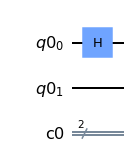

In [7]:
# Aplicamos una puerta Hadamard sobre el cúbit 0 y mostramos el circuito formateado
circuit.h(qr[0])
circuit.draw(output='mpl')

Una de las propiedades más relevantes de los cúbits es el entrelazamiento cuántico. Este puede ser provocado de múltiples maneras. Una de éstas es haciendo uso de una puerta controlada Pauli-X.

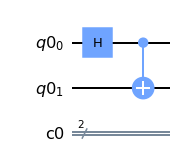

In [8]:
# Aplicamos controlled NOT para crear entrelazamiento entre q0_0 y q0_1
# cx (control, target)
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

Otra de las propiedades consiste en el colapso de los estados en superposición en el momento en que se realiza una operación de medición sobre los mismos. Para observar este fenómeno realizamos mediciones en ambos cúbits y almacenamos los resultados de las mediciones en los bits clásicos. Esta operación forzará a los estados de los cúbits q0_0 y q0_1 a colapsar en alguno de los estados base |0> o |1>

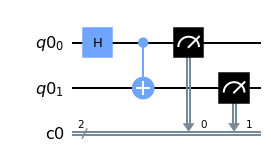

In [9]:
# Medimos los valores de los registros cuánticos y los almacenamos en los registros clásicos
# measure (target_of_measurement, storage register)
circuit.measure(qr, cr)
circuit.draw(output='mpl')

Esto finaliza nuestro circuito de prueba. Lo siguiente que haremos será tomar el circuito y simular una ejecución sobre un ordenador cuántico. Para ello el componente Aer de qiskit nos proporciona un backend especial llamado "qasm_simulator" que realiza precisamente esta tarea. Almacenamos el simulador en una variable, y lo establecemos como backend de la ejecución mediante el parámetro backend de la función execute().

In [10]:
# Obtenemos el simulador de circuitos cuánticos Aer (qasm - quantum assembly language)
simulator = Aer.get_backend('qasm_simulator')
# Ejecutamos el circuito empleando el simulador como backend
# execute(target, backend)
result = execute(circuit, backend = simulator).result()

Una vez el circuito se ha simulado y tenemos los resultados almacenados en una variable podemos visualizarlo. En nuestro caso nos interesa generar un histograma donde se observen los valores obtenidos en los dos bits tras las 1024 ejecuciones que ha realizado el simulador.

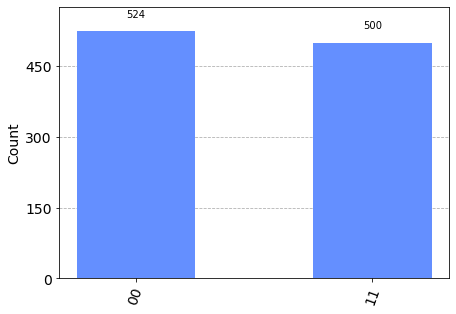

In [11]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Nuestro circuito tenía como finalidad alterar el estado del cúbit q0_1 en función del estado del cúbit q0_0 (cuyo estado se encuentra al inicio del circuito en superposición debido a la puerta Hadamard) dejándolo igual al mismo mediante la puerta controlled NOT. Podemos ver como efectivamente los únicos resultados que aparecen en el histograma son 00 y 11, es decir, ambos bits han tomado el mismo valor al realizar la medición. 

Podemos ver el tiempo de ejecución de nuestro circuito empleando el simulador como backend tomando el atributo time_taken de nuestra variable resultado.

In [12]:
execution_time = result.time_taken
execution_time

0.004999637603759766

Si queremos ejecutar ahora nuestro circuito empleando como backend un ordenador cuántico real en lugar del simulador tenemos que comprobar primero qué backends de IBM se encuentran disponibles actualmente. Para ello empleamos la librería qiskit_ibm_provider.

In [12]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()

# display current supported backends
print(provider.backends())

[<IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibmq_manila')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('ibm_lagos')>, <IBMBackend('ibm_perth')>, <IBMBackend('ibmq_belem')>, <IBMBackend('ibmq_jakarta')>, <IBMBackend('ibmq_quito')>, <IBMBackend('ibmq_lima')>, <IBMBackend('simulator_statevector')>, <IBMBackend('ibmq_qasm_simulator')>]


De entre los posibles backends (entre los que podemos observar se encuentra el simulador que hemos empleado anteriormente) podemos escoger el que deseemos. Podemos ver las características de cada uno y su carga de trabajo actual en la página de IBMQ (https://quantum-computing.ibm.com/services/resources). Para este ejemplo hemos optado por el backend "ibmq_lima".

In [13]:
qcomp = provider.get_backend("ibmq_lima")
job = execute(circuit, backend = qcomp)

También en la página de IBMQ podemos ver el estado de nuestro trabajo una vez hemos solicitado su ejecución, pero si queremos monitorizarlo sin necesidad de acceder a la página siempre podemos usar la librería qiskit.tools.monitor creada con ese mismo propósito.

La función job_monitor(trabajo) nos informará del estado del objeto trabajo pasado como parámetro, indicando "job is queued" si se encuentra en cola, y "job has successfully run" una vez ha finalizado su ejecución.

In [14]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


Una vez el trabajo finaliza podemos extraer el resultado del objeto y mostrar el histograma tal y como hicimos tras la simulación. Tratar de llamar a la función result() sin haber finalizado el trabajo dará como resultado un error.

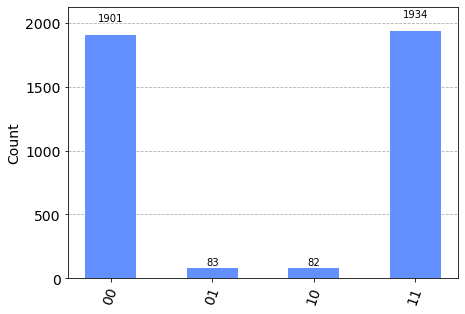

In [16]:
result = job.result()
plot_histogram(result.get_counts(circuit))

Este trabajo ha sido ejecutado 4000 veces y podemos observar como el resultado 01 y 10 aparecen en el histograma. Esto se debe a la naturaleza sujeta a márgenes de error de la computación cuántica y a factores como el ruido que afectan mucho más a las tareas de información cuántica que a las clásicas. Existen métodos para mitigar este ruido y reducir así los márgenes de error pero quedan fuera de la extensión de este trabajo.

### Segundo ejemplo - Representación de resultados mediante statevectors
En este segundo circuito que haremos, también muy sencillo, se tiene por objetivo el obtener como resultado de una ejecución un estado de la forma: (a.+b.j |0> + c.+d.j |1>) que nos indique las amplitudes de probabilidad de los estados base |0> y |1>. Además, podemos mostrar este vector de estado haciendo uso de la esfera de bloch.

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


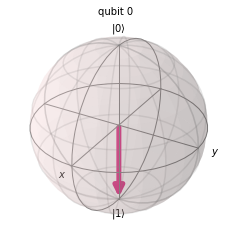

In [13]:
## Segundo Ejercicio
# Importamos la función para mostrar resultados en esferas de bloch
from qiskit.tools.visualization import plot_bloch_multivector

# Generamos un circuito con 1 bit clásico y 1 cúbit.
circuit = QuantumCircuit(1,1)
# Aplicamos una puerta Pauli-X al cúbit 0
circuit.x(0)
# Establecemos como backend el 'statevector_simulator' que devuelve los resultados en forma de vector de estado
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
# Obtenemos el vector de estado del resultado de la ejecución
statevector = result.get_statevector()
# Mostramos el vector de estado en su forma escrita
print(statevector)
# Mostramos el vector en la esfera de Bloch
plot_bloch_multivector(statevector)

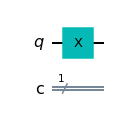

In [14]:
# Diagrama del circuito
%matplotlib inline
circuit.draw(output = 'mpl')

En este punto del ejemplo tenemos un cúbit en un determinado estado, pero aún no hemos realizado ninguna medición. Si queremos realmente obtener resultados que puedan contrastarse necesitamos realizar una medición de dicho cúbit sobre el registro clásico. Para ello añadimos la operación de medición al circuito y podemos emplear el simulador qasm como backend para la ejecución. Con el fin de tener una cantidad de resultados suficientemente alta para extraer información del circuito lo ejecutaremos 1024 veces y mostraremos los valores almacenados en el bit clásico en cada una de esas ejecuciones mediante un histograma.

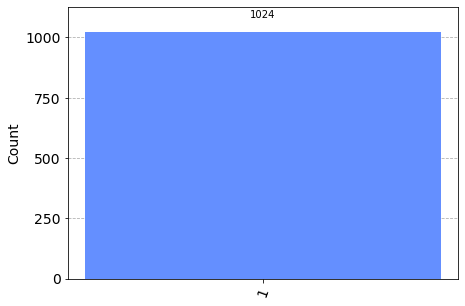

In [15]:
# Mostrar los resultados de una simulación
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

Podemos ver como efectivamente el cúbit se encontraba en el estado |1> ya que al realizar mediciones, con un 100% de probabilidad, hemos obtenido el valor 1. Además del statevector y la esfera de bloch también podemos mostrar los resultados en su forma de matriz unitaria haciendo uso del simulador "unitary_simulator" y obteniendo el unitario de la variable resultado de la ejecución.

In [16]:
# Mostrar un circuito de forma matricial
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend=simulator).result()
unitary = result.get_unitary()
print(unitary)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


### Tercer ejemplo - Algoritmo de teleportación de información
Este ejemplo constituye uno de los protocolos básicos en computación cuántica. Se trata de un algoritmo sencillo que permite transportar la información de un cúbit a otro haciendo uso del entrelazamiento cuántico. Aunque se llame teleportación, esta información no puede viajar más rápido que la velocidad de la luz. El objetivo del algoritmo es transferir el estado de un cúbit a otro sin causar entrelazamiento directo entre estos y de forma casi instantánea.

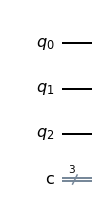

In [17]:
## Tercer ejercicio
# Generamos un circuito con 3 bits clásicos y 3 cúbits
circuit = QuantumCircuit(3,3)
%matplotlib inline
circuit.draw(output='mpl')

Aplicamos una puerta Pauli-X sobre el cúbit 0 para asegurarnos de que se encuentra en el estado |1>

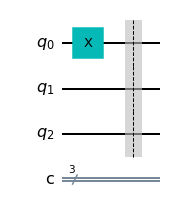

In [18]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

Aplicamos una puerta de hadamard sobre q1 y una CNOT sobre el q2 empleando q1 como cúbit control.
Esto provoca un entrelazamiento fuerte entre los cúbits q1-q2

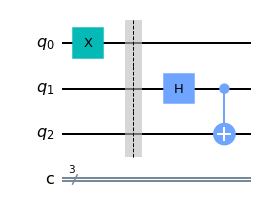

In [19]:
circuit.h(1)
circuit.cx(1, 2)
circuit.draw(output='mpl')

A continuación se emplea una puerta CNOT sobre q1 empleando q0 como control.
Esto provoca un entrelazamiento fuerte entre los cúbits q0-q1.


Aplicamos una puerta Hadamard sobre q0, desde este punto el valor de q0 ya no es conocido.

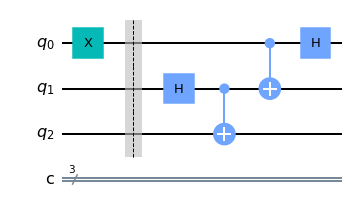

In [20]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output='mpl')

Entre las dos barreras el valor de q0 ha sido |1>. Posterior a la segunda barrera ese valor se borra. Previamente a la segunda operación CNOT los valores de q1 y q2 pueden ser |00> y |11>. Tras aplicar la segunda puerta CNOT con el estado q0 siendo |1> garantizado, los posibles valores de q1 y q2 pasan a ser |10> y |01>. Por tanto al realizar las mediciones sobre q0 y q1 tras la segunda barrera todas las combinaciones de estos dos cúbits son posibles: 00, 01, 10, 11.

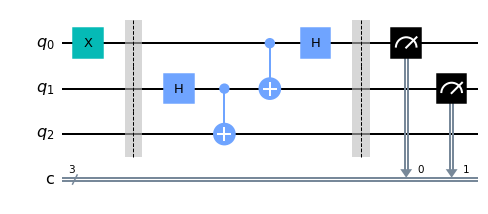

In [21]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

En este punto se aplica una puerta CNOT sobre q2, teniendo q1 como control seguido de una puerta controlled Pauli-Z entre q0 y q2. Es necesario para el funcionamiento del algoritmo que las mediciones de q0 y q1 se realicen ANTES de estas operaciones. Ya que para poder obtener en q2 el estado original de q0 es necesario que los estados de q0 y q1 colapsen previamente. Las operaciones a realizar para recuperar el estado original dependen de los bits clásicos que se reciban en el momento previo a la tercera barrera. Estas operaciones se pueden calcular mediante matrices y la sucesión de CNOT y CZ no es más que un caso concreto.

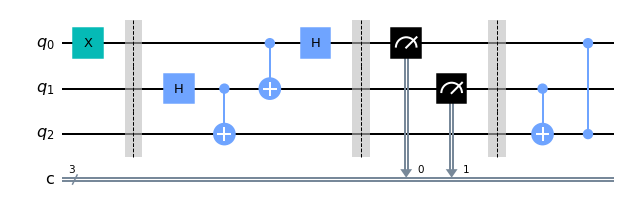

In [22]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

Finalmente medimos el cúbit q2 cuyo valor es el único que nos interesa, ya que, como hemos mencionado previamente, el estado original de q0 ha sido alterado en el proceso de transmisión de información. Si el algoritmo tiene éxito el valor de c2 al final de la ejecución deberá ser 1 con un 100% de probabilidades.

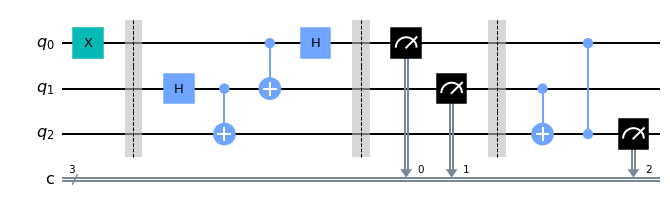

In [23]:
circuit.measure(2,2)
circuit.draw(output='mpl')

Contruído el circuito es hora de ejecutarlo mediante el simulador de qasm. Puede observarse en los resultados como todos los elementos del histograma tienen en común que el valor de c2 es 1, y tal como esperábamos, los valores de c0 y c1 conforman todo el espacio de posibles soluciones: 00, 01, 10, 11.

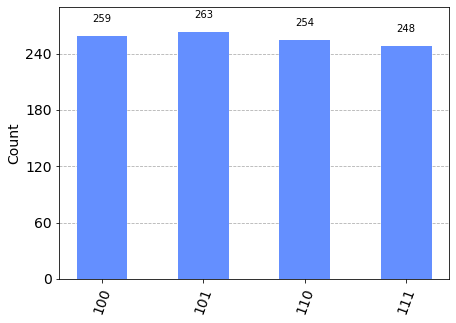

In [24]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)
# Se teletransporta el estado |1> al bit más significativo. IMPORTANTE: los bits q0 y q2 no están entrelazados, es decir, las mediciones no tienen por qué coincidir, se teleporta el valor de un instante concreto (cuando q0 valía |1>), posterior a eso ambos qbits son independientes

### Cuarto ejemplo - Algoritmo Bernstein-Vazirani
Tras el anterior ejercicio comienzan a quedar claros muchos conceptos de computación cuántica y ya comenzamos a familiarizarnos con las funciones de la librería qiskit. Se procede a implementar el algoritmo Bernstein-Vazirani que constituye un primer acercamiento al término oráculo cuántico. La función de este algoritmo es "adivinar" un valor oculto, supuesto que tenemos un oráculo (ver memoria para más información) que toma por entrada un valor y devuelve la respuesta SI si dicho valor coincide y la respuesta NO en caso contrario. Mediante un algoritmo clásico el número mínimo de veces que tendríamos que llamar a esta función sería N, donde N es el tamaño en bits del número secreto, mientras que el algoritmo Bernstein-Vazirani lo logra empleando una única llamada sin importar el tamaño de N. Esto supone un "speed-up" considerable respecto a su versión clásica.

El primer paso es escoger un número secreto, esto puede realizarse mediante un generador de números aleatorios o simplemente incorporando un número nosotros mismos. Ya que el funcionamiento del algoritmo es igual optaremos por el método más rápido que es incorporar un número. En nuestro caso se ha escogido el número 1001.

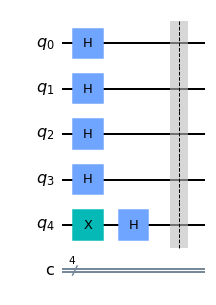

In [26]:
## Cuarto ejercicio - Algoritmo Bernstein-Vazirani

# Escogemos un número secreto
secret_number = '1001'
# El tiempo de ejecución fueron 3s
# Generamos un circuito cuántico que tiene N bits clásicos y N+1 cúbits. Donde N es el tamaño en bits del número secreto.
circuit = QuantumCircuit(len(secret_number)+1, len(secret_number))

# Inicializamos los N primeros cúbits al estado |+> y el último cúbit al estado |->
circuit.h(range(len(secret_number)))
circuit.x(len(secret_number))
circuit.h(len(secret_number))

circuit.barrier()
circuit.draw(output='mpl')

En este punto tenemos la inicialización del circuito. El siguiente paso es construir el oráculo cuya función se ha explicado anteriormente. Este tipo de oráculos en que lo que se pretende no es modificar el estado del cúbit objetivo si no aplicar una fase sobre el cúbit control se conocen como oráculos de fase (explicados en la memoria). Para implementar dicho oráculo de fase tenemos que aplicar una puerta CNOT por cada bit a 1 de nuestro número secreto. El cúbit correspondiente actuará de control y recibirá una fase mientras que el cúbit objetivo, inicializado a |-> permanece intacto. 

Nótese que empleamos reversed(secret_number) para mantener la concordancia entre la posición de un cúbit y su peso en el número secreto.

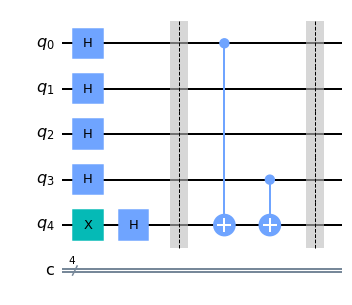

In [27]:
for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        circuit.cx(ii, len(secret_number))

circuit.barrier()
circuit.draw(output='mpl')

Para finalizar el algoritmo añadimos otra "pared" de puertas Hadamard (el cúbit |-> ya no nos interesa ya que ha cumplido su función en el oráculo de fase) y podemos realizar las mediciones. Si el algoritmo ha funcionado correctamente deberemos encontrar el número secreto 1001 entre los bits c0-c3. Mostramos el diagrama del circuito completo.

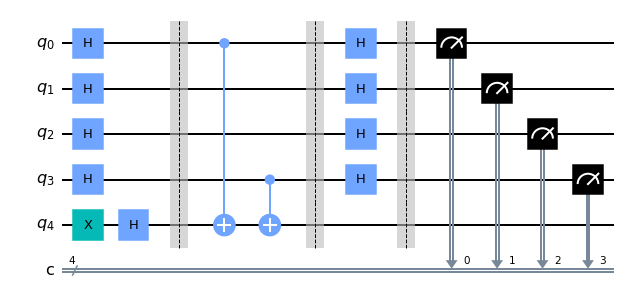

In [28]:
circuit.h(range(len(secret_number)))

circuit.barrier()

circuit.measure(range(len(secret_number)), range(len(secret_number)))
circuit.draw(output='mpl')

Y los resultados de la ejecución empleando el simulador qasm en forma, una vez más, de histograma.

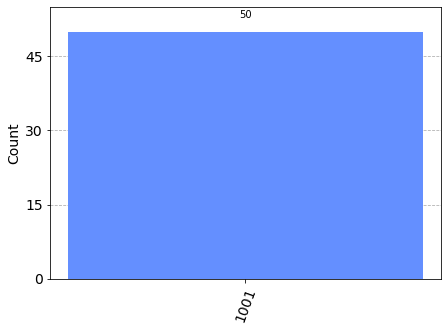

In [29]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 50).result()
counts = result.get_counts()
plot_histogram(counts)

Tal y como se esperaba de las 50 ejecuciones la totalidad de estas han devuelto como resultado de las mediciones el valor 1001. Podemos comprobar ahora los resultados ejecutando en un procesador cuántico en lugar de usando el simulador. El proceso es igual al ya visto anteriormente, seleccionar el backend en el que se va a ejecutar, solicitar el trabajo en la nube y esperar a los resultados.

Nota: la importación de IBMProvider está repetida en esta celda y en una superior. Esto se debe a que las ejecuciones han sido realizadas en sesiones diferentes debido a los largos tiempos de espera de las solicitudes, por tanto el Kernel no mantiene la importación del paquete entre sesiones. Esto puede ocurrir con cualquiera de los paquetes si el lector reproduce este cuaderno de forma desordenada o en sesiones diferentes. Para resolver el error basta con reimportar la librería o función correspondiente.

In [30]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
qcomp = provider.get_backend("ibmq_lima")
job = execute(circuit, backend = qcomp)

Debemos esperar a que el trabajo termine. En este caso en lugar de utilizar el monitor de qiskit se ha monitorizado el estado del trabajo desde la web de IBMQ.

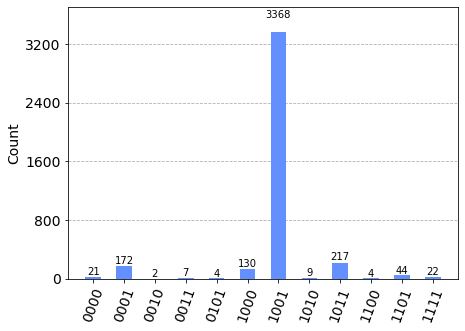

In [31]:
result = job.result()
plot_histogram(result.get_counts(circuit))

Para mostrar mejor el porcentaje de error cometido por el procesador cuántico real se han realizado 4000 ejecuciones. Podemos observar como en su mayoría, en un 84.2% de las ejecuciones, el valor resuelto es el esperado 1001. El otro 15.8% de las ejecuciones son valores no válidos producto de errores y algunas posibles soluciones como 0100 no aparecen en esta ejecución pero pueden aparecer en otra ejecución que se realice.

### Quinto ejemplo - Transformada de Fourier cuántica
Este ejemplo consiste en la implementación de una transformada de Fourier cuántica, que no es más que un cambio de base, en nuestro caso de la base clásica {|0>, |1>} a la base de Fourier {|+>, |->}. Para ello se emplean las puertas genéricas condicionales U (para más información ver la memoria) y como parámetros empleamos pi/2 y sus cuadrados (pi/4, pi/8, ...).

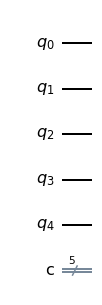

In [32]:
## Usamos la rotación condicional cu1() U-Rotation
# Si el bit usado como control vale |1> debemos hacer una rotación de fase R.
# Si el bit usado como control vale |0> no hacemos nada
# Forma matricial de U-Rotation [1           0  ] 
#                               [0   e^2pi*i/2^k]

# Importamos la librería numpy, una librería de python muy conocida para el trato con matrices y matemáticas en general
import numpy as np
# Almacenamos el valor de pi que usaremos varias veces
pi = np.pi

# Creamos un circuito con 5 cúbits y 5 bits clásicos
nq = 5
circuit = QuantumCircuit(nq,nq)

circuit.draw(output='mpl')      

Aquí se puede observar como la construcción del circuito que produce la transformada de Fourier cuántica es estática y sólo depende del número de cúbits q transformar. Esto quiere decir que el circuito para transformar 2 cúbits no es el mismo que para 4 cúbits, pero el circuito para transformar 2 o 4 cúbits es único.

Para construirlo iteramos sobre todos los cúbits y para cada uno aplicamos una puerta Hadamard. Tras aplicar la puerta iteramos sobre los cúbits restantes y aplicamos una rotación controlada cuyo ángulo disminuye a la mitad conforme se alejan los cúbits. Al mostrar el circuito no queda del todo claro debido a la distribución que realiza el formato 'mpl' de las puertas pero si observamos detenidamente hay 4 puertas condicionales conectadas a q0 y a cúbits de mayor peso (con ángulos pi/2, pi/4, pi/8 y pi/16), 3 puertas condicionales conectadas a q1 y a cúbits de mayor peso, no contamos la que conecta q0 y q1 ya que esta ha sido contabilizada entre las de q0 (con ángulos pi/2, pi/4 y pi/8), etc. Es sencillo ver el patrón y si se distribuyen las puertas de la forma en que son declaradas puede verse de forma aún más clara.

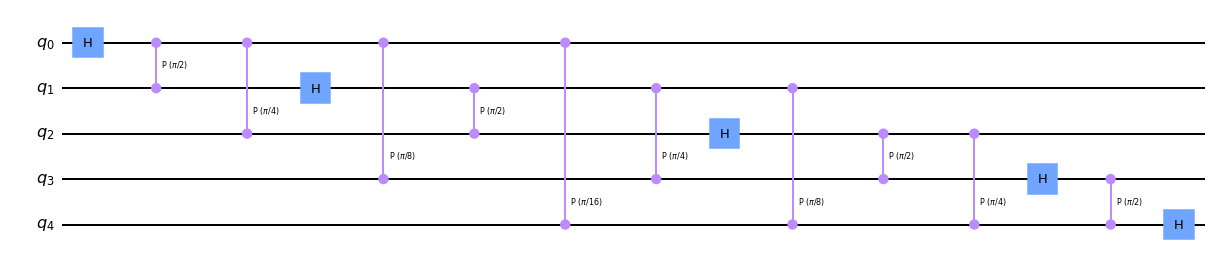

In [33]:
def QuantumFourierTransform(nqubits):
    new_circuit = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        new_circuit.h(qubit)
        
        for qubit2 in range(qubit+1, nqubits):
            new_circuit.cp(pi/(2**(qubit2-qubit)), qubit2, qubit)
    return new_circuit

circuit = QuantumFourierTransform(nq)
circuit.draw(output='mpl')

Para probar nuestro circuito escogemos un estado inicial al azar y le aplicamos el circuito para ver cómo éste modifica los estados del sistema. La visualización en esferas de Bloch resulta útil en esta situación para comprender como se realiza esta transformación.

Empleamos la función initialize para indicar al circuito que el estado que hemos creado se deben corresponder con los estados iniciales de los cúbits y añadimos el circuito de la transformada de Fourier mediante la función append().

Finalmente mostramos los resultados en esferas de Bloch.

Computational Basis


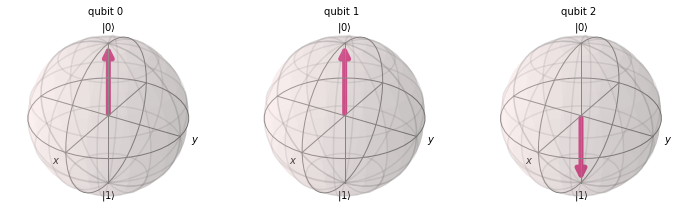

Fourier Basis


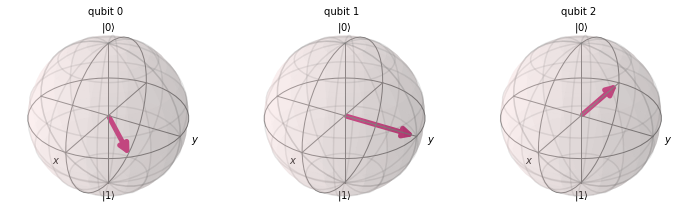

In [35]:
from qiskit.quantum_info import Statevector

state = '001'
circuit = QuantumCircuit(len(state))
circuit.initialize(Statevector.from_label(state).data, circuit.qubits[::-1])
print("Computational Basis")
display(plot_bloch_multivector(Statevector.from_instruction(circuit).data))
print("Fourier Basis")
circuit.append(QuantumFourierTransform(len(state)), circuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(circuit).data))

### Implementación final - Aplicación del algoritmo de Grover para la resolución del problema 3-SAT

La explicación detallada del funcionamiento de este algoritmo se encuentra en la memoria. En este apartado vamos a comentar las funciones que se utilizan. Ya que se trata de uno de los dos circuitos troncales del proyecto se han mantenido todos los imports necesarios para el funcionamiento del mismo. De esta manera, puede ser ejecutado sin ejecutar los pasos anteriores del cuaderno.

Comenzamos por crear una instancia de problema 3-SAT, para ello empleamos la notación DIMACS-CNF. Almacenamos la instancia en la variable input_3sat_instance.

In [36]:
input_3sat_instance = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

A continuación importamos las clases y funciones necesarias: éstas serán Grover (para el algoritmo de grover implementado por qiskit), Sampler (permite la ejecución mediante un backend que simula ejecuciones y almacena los resultados), BackendSampler (igual que el Sampler pero permite especificar en qué backend queremos realizar las ejecuciones), AmplificationProblem (define lo que es la estructura general de un problema de amplificación de fase y crea el objeto de tipo problema que puede ser resuelto por la clase Grover a partir de un oráculo), PhaseOracle (nos permite construir el oráculo de fase a partir de la instancia de 3-SAT. Este oráculo será empleado como se acaba de comentar por AmplificationProblem para generar el objeto de tipo Problem), plot_histogram (para mostrar los resultados como histograma) y finalmente IBMProvider (para seleccionar un backend de ejecución de IBM).

Tras importar las clases y funciones necesarias se genera un fichero temporal donde introducimos nuestra instancia de 3-SAT ya que el oráculo de fase se construye desde fichero.

In [42]:
## Aplicación del algoritmo de Grover al problema 3-SAT
from qiskit.algorithms import Grover
from qiskit.primitives import Sampler
from qiskit.primitives import BackendSampler
from qiskit.algorithms import AmplificationProblem
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.tools.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider

import tempfile

fp = tempfile.NamedTemporaryFile(mode='w+t', delete=False)
fp.write(input_3sat_instance)
file_name = fp.name
fp.close()
oracle = None

Se genera el oráculo de fase a partir del fichero que acabamos de crear

In [38]:
oracle = PhaseOracle.from_dimacs_file(file_name)

Creamos el objeto de tipo problema y la instancia de algoritmo de Grover para indicarle que solucione nuestro problema empleando el algoritmo de Grover.

En este punto si queremos que la ejecución se realice en un procesador cuántico debemos comentar la segunda línea donde indicamos el Sampler básico y descomentar las líneas de la 4 a la 6, indicando así un backend concreto para su ejecución.

In [39]:
problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
grover = Grover(sampler=Sampler())

#provider = IBMProvider()
#backend = provider.get_backend("ibmq_lima")
#grover = Grover(sampler = BackendSampler(backend))

result = grover.amplify(problem)

Finalmente mostramos los resultados. Vemos como para esta instancia de 3-SAT el algoritmo nos ha permitido acercarnos bastante al autovector |w> pero no lo ha replicado perfectamente, por ello también aparecen soluciones no válidas aunque con una probabilidad mucho menor. Esto puede resolverse empleando algunas estrategias que nos permitirían alcanzar el valor exacto de |w> pero que quedan fuera del ámbito de este proyecto.

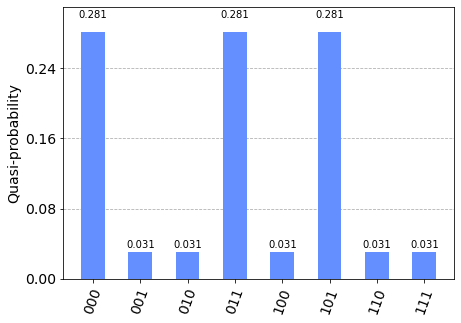

In [40]:
display(plot_histogram(result.circuit_results[0]))

Demostrando que el algoritmo no hace nada que no hayamos aprendido a hacer en la memoria se muestra a continuación el oráculo generado por el algoritmo, que no es más que un oráculo simple como los que hemos estudiado ajustado a esta instancia de 3-SAT. Si se modifica el fichero de instancia, y se recompila el oráculo, puede verse en esta celda cómo afectan los cambios al oráculo.

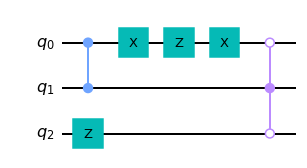

In [41]:
oracle.draw('mpl')